In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_palette(sns.color_palette("deep", 10))
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean
from ploting import *

%matplotlib inline

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2018-01-10 11:31:03.659497'

In [2]:
from ploting import *
plotter = ResultsPlotter(f='../IO/niva_pH_8_NRMSD_chl_1x_weights.mat')


In [3]:
sediment_data = pd.read_excel('Vansjo/App P VanI-II-III QC Jan 2017.xlsx', sheetname='Van-I', skiprows=1)
sediment_data= sediment_data.convert_objects(convert_numeric=True)
sediment_data

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Depth,Unnamed: 1,Loose-bound-P,Fe-P,Al-P,Organic-P,Ca-P,Residuals,Unnamed: 8,P,Al,Ca,Fe,K,Mg,Mn,Na,S
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.25,NaN,0.037801,4.420408,1.662698,1.487839,0.614230,0.527059,NaN,0.021200,0.022500,0.848250,1.398000,0.358050,0.296450,0.834400,0.254450,0.035300
3,-0.75,NaN,0.056446,0.170844,5.179115,4.790477,1.697674,2.824972,NaN,0.053775,0.042025,1.407875,2.992750,0.649325,0.467625,1.194450,0.737975,0.122225
4,-1.25,NaN,0.075763,10.196803,5.698372,6.683423,1.608889,2.192716,NaN,0.086350,0.061550,1.967500,4.587500,0.940600,0.638800,1.554500,1.221500,0.209150
5,-1.75,NaN,0.048051,10.008472,5.545016,5.123288,2.230383,3.519108,NaN,0.123000,0.109950,2.971000,6.893000,1.537000,0.945550,2.218500,1.992500,0.377350
6,-2.50,NaN,0.125644,13.290820,5.499279,4.703220,2.502118,2.593593,NaN,0.462500,0.343800,7.489500,19.945000,4.412500,2.622500,5.302500,23.910000,0.757500
7,-3.50,NaN,0.060374,9.739427,6.002393,5.091492,2.066265,3.761248,NaN,0.572200,0.318950,8.673500,26.710000,5.490000,2.884500,5.861000,12.335000,1.072500
8,-4.50,NaN,0.043935,6.535102,6.685767,5.479765,1.420557,3.059041,NaN,0.444150,0.322750,8.099500,20.630000,3.904000,2.368000,4.822500,8.439500,1.030500
9,-6.00,NaN,0.245369,12.268449,6.440936,5.275425,1.447462,2.690449,NaN,0.808300,0.357400,13.808000,29.140033,6.856000,6.286000,8.240867,37.916667,1.043900


In [4]:
y_a = 0.215

In [5]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, UnivariateSpline

In [6]:
z = np.linspace(0,30,300)

In [7]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Organic-P'][2:]/30.973)
yi = ius(-z)
# list(yi)

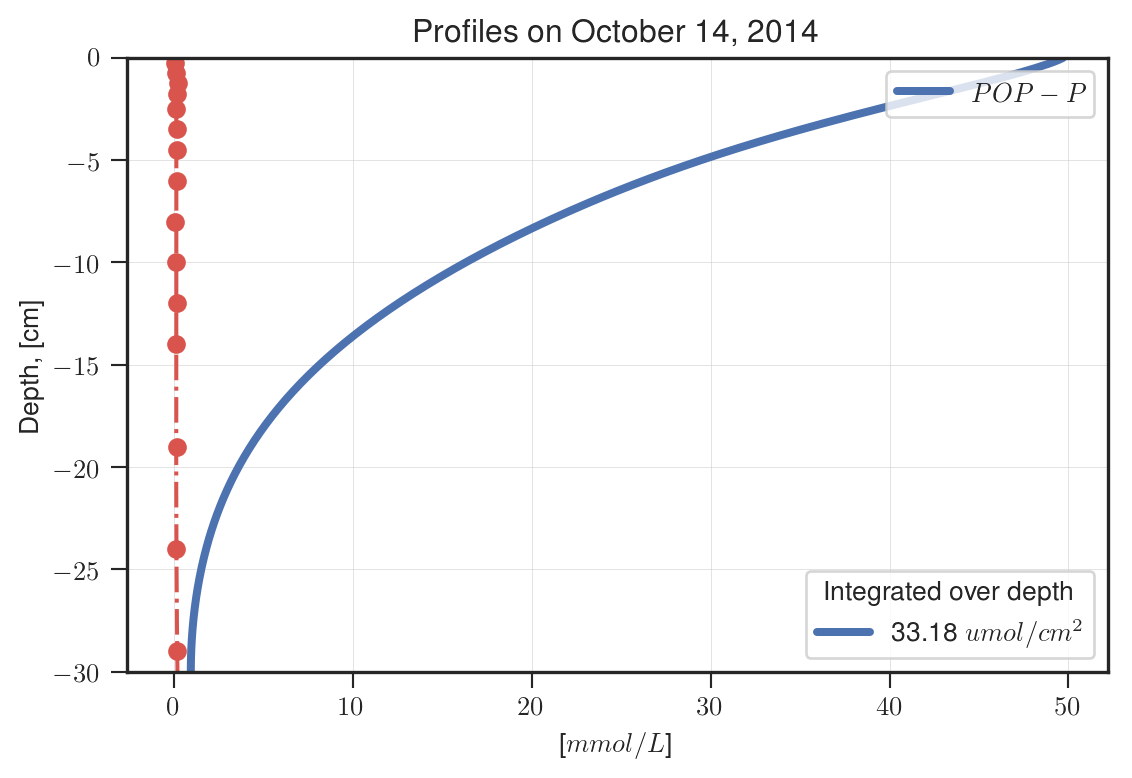

In [8]:
ax = plotter.profile('sediment', ['POP'], years_ago=y_a)
plt.scatter(sediment_data['Organic-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)


In [9]:
ius = UnivariateSpline(sediment_data['Depth'][2:], (sediment_data['P'][2:] + sediment_data['Loose-bound-P'][2:])/30.973)
yi = ius(-z)
# list(yi)

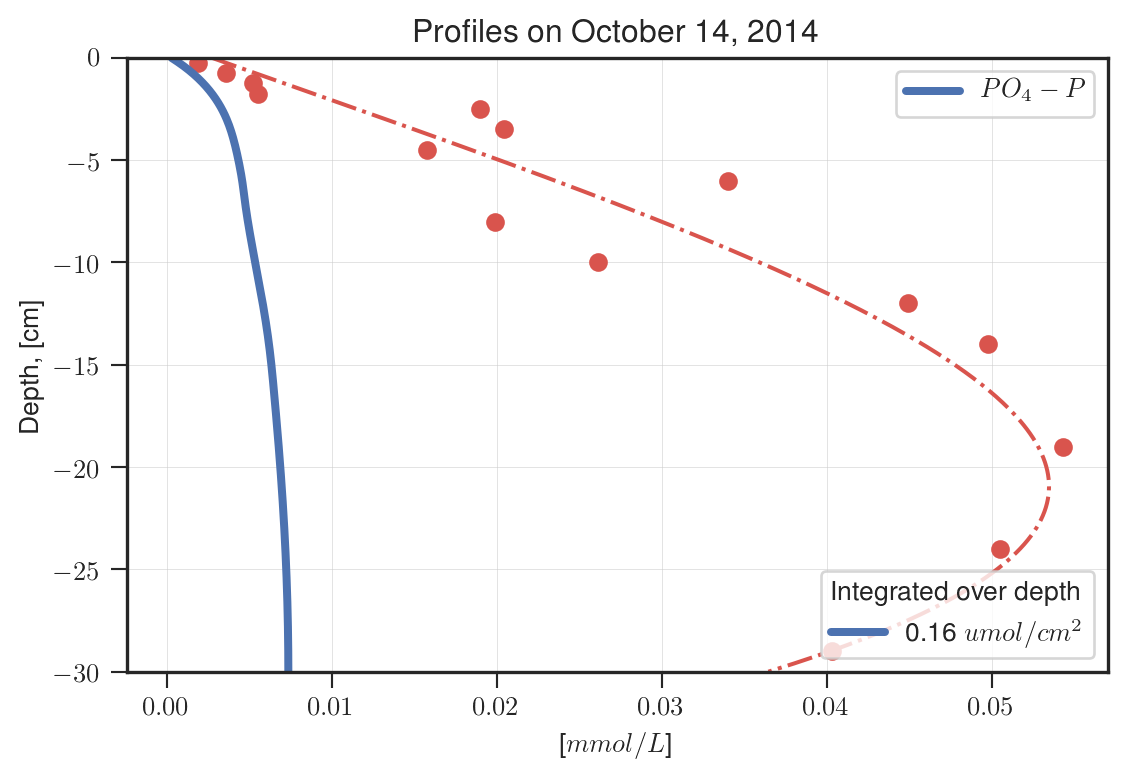

In [10]:
ax = plotter.profile('sediment', ['PO4'], years_ago=y_a)
ax.scatter(sediment_data['P']/30.973 + sediment_data['Loose-bound-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)


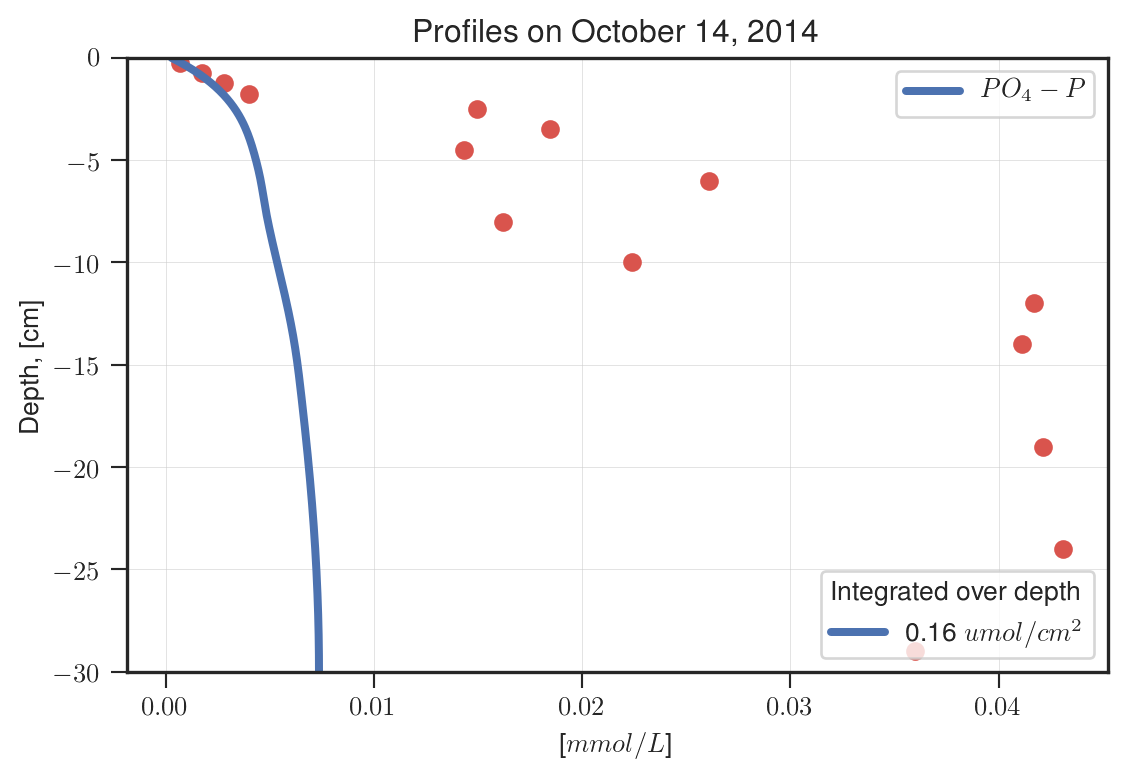

In [11]:
ax = plotter.profile('sediment', ['PO4'], years_ago=y_a)
ax.scatter(sediment_data['P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)


In [12]:
# ax = plotter.profile('sediment', ['Fe2'], years_ago=y_a)
ax.scatter(sediment_data['Fe']/55.845, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)

In [13]:
ius = UnivariateSpline(sediment_data['Depth'][2:], (sediment_data['Ca'][2:])/80.1560)
yi = ius(-z)
# list(yi)

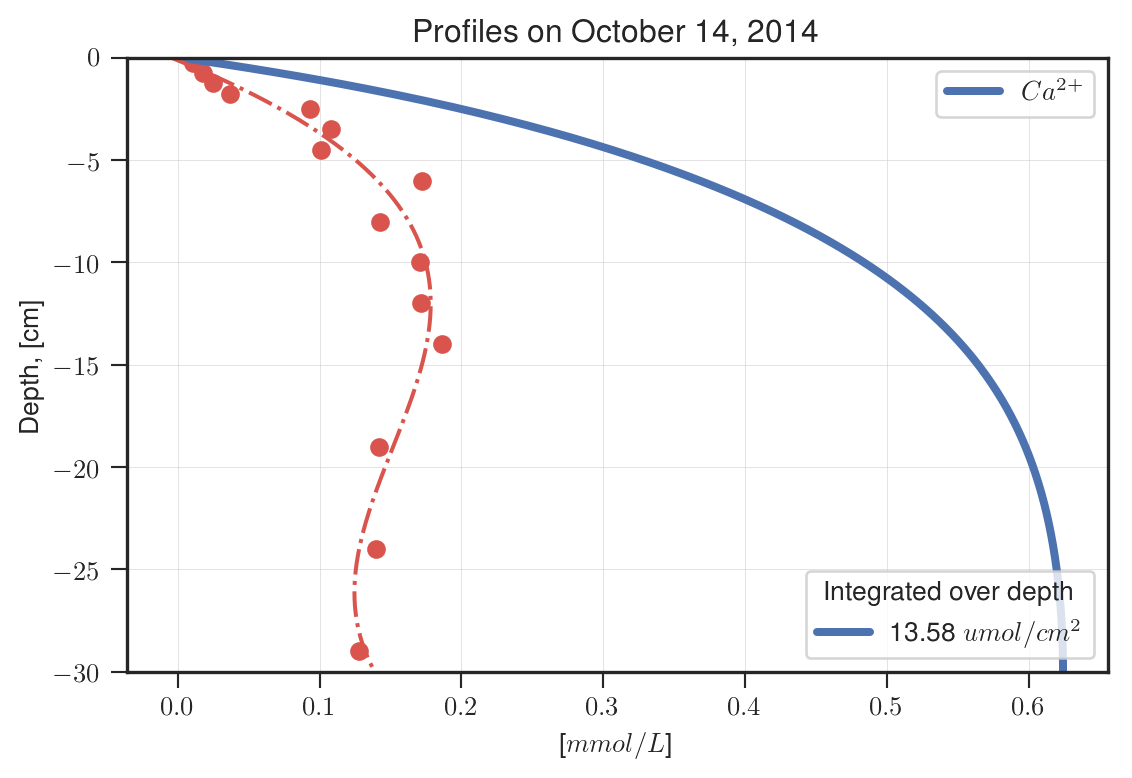

In [14]:
ax = plotter.profile('sediment', ['Ca2'], years_ago=y_a, convert_units=0)
ax.scatter(sediment_data['Ca']/80.1560, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

In [15]:
ius = Rbf(sediment_data['Depth'][2:], sediment_data['S'][2:]/32)
yi = ius(-z)
# list(yi)

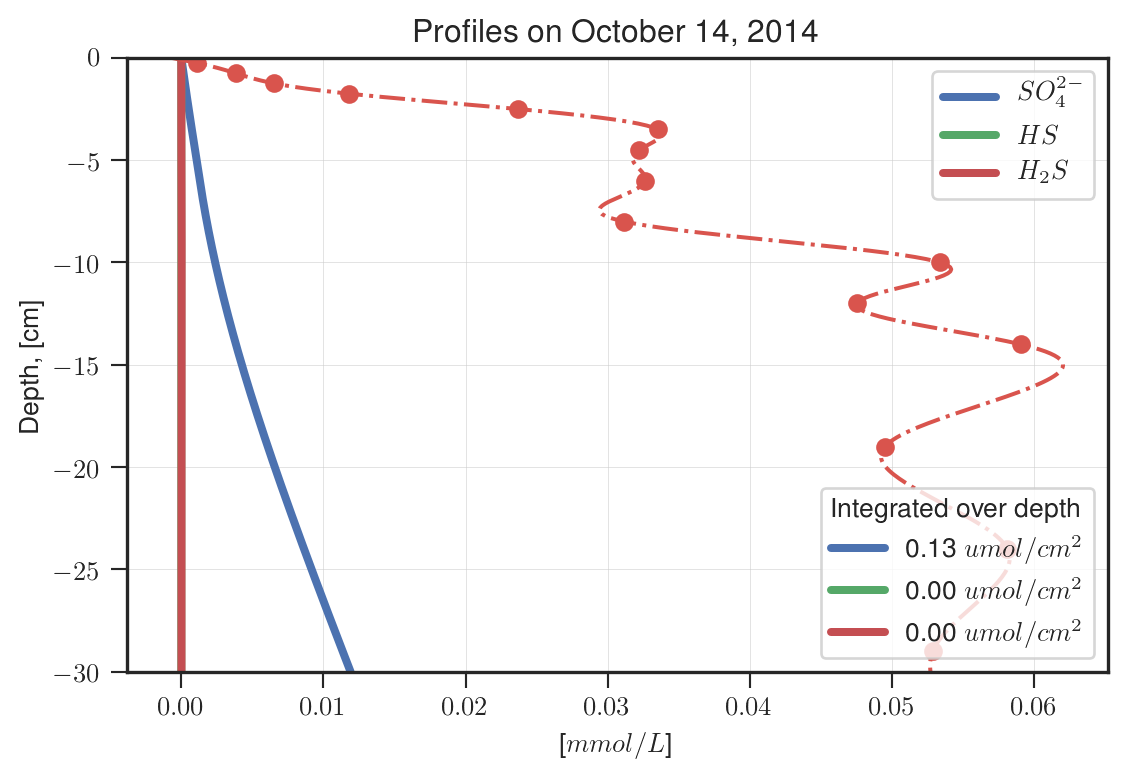

In [16]:
ax = plotter.profile('sediment', ['SO4', 'HS', 'H2S'], years_ago=y_a)
ax.scatter(sediment_data['S']/32, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

In [17]:
ius = Rbf(sediment_data['Depth'][2:], sediment_data['Fe-P'][2:]/30.973)
yi = ius(-z)
# list(yi)

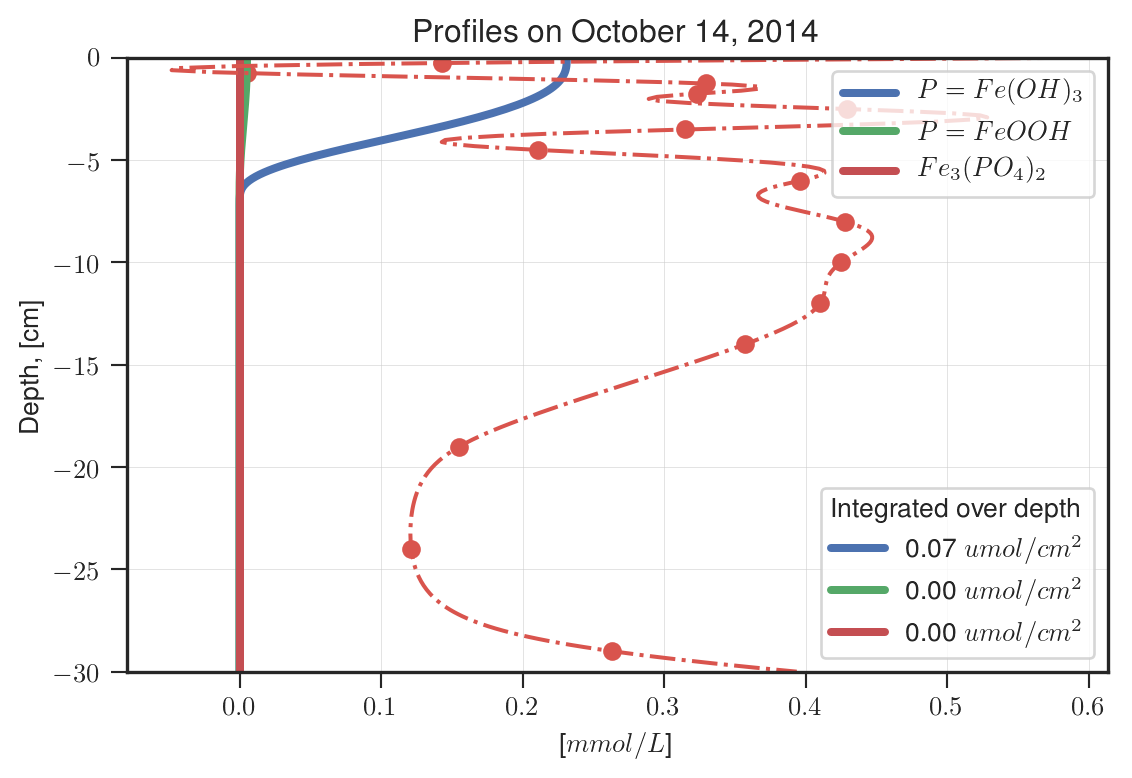

In [18]:
init_a = 19.0105
ax = plotter.profile('sediment', ['PO4adsa', 'PO4adsb', 'Fe3PO42'], years_ago=y_a)
ax.scatter(sediment_data['Fe-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

In [19]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Ca-P'][2:]/30.973)
yi = ius(-z)
# list(yi)

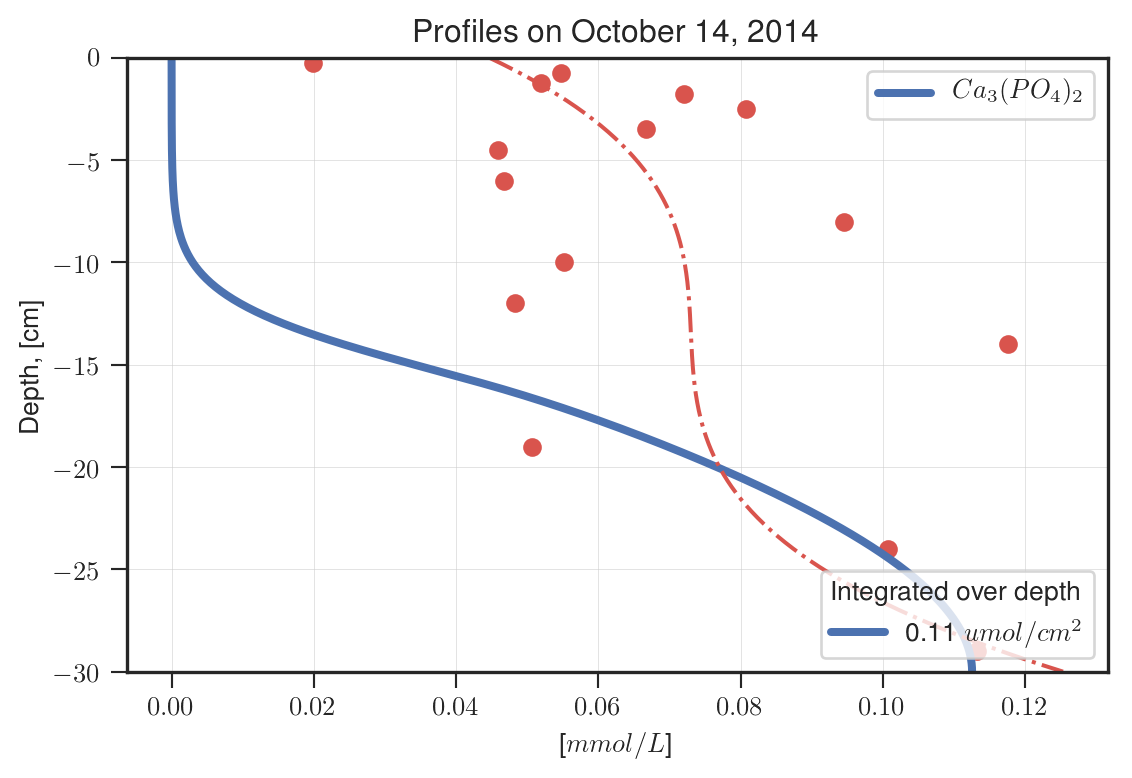

In [20]:
ax = plotter.profile('sediment', ['Ca3PO42'], years_ago=y_a)
ax.scatter(sediment_data['Ca-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

In [21]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Al-P'][2:]/30.973)
yi = ius(-z)
# list(yi)

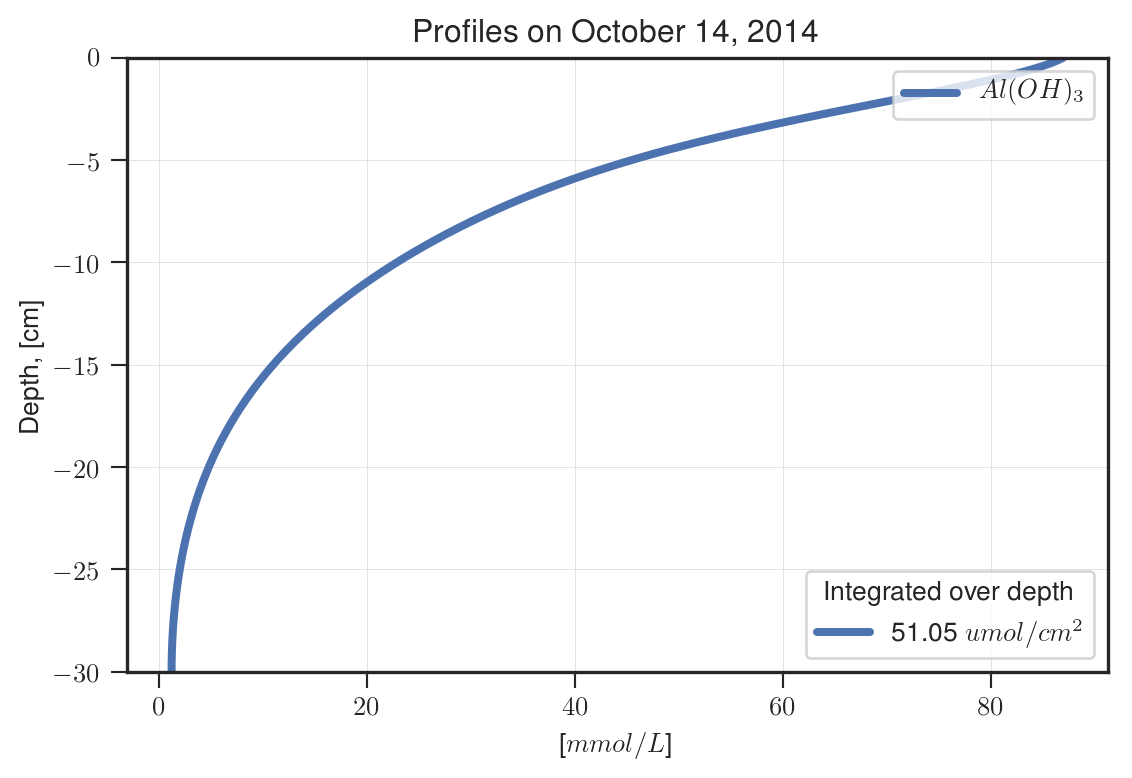

In [22]:
ax = plotter.profile('sediment', ['AlOH3'], years_ago=y_a)

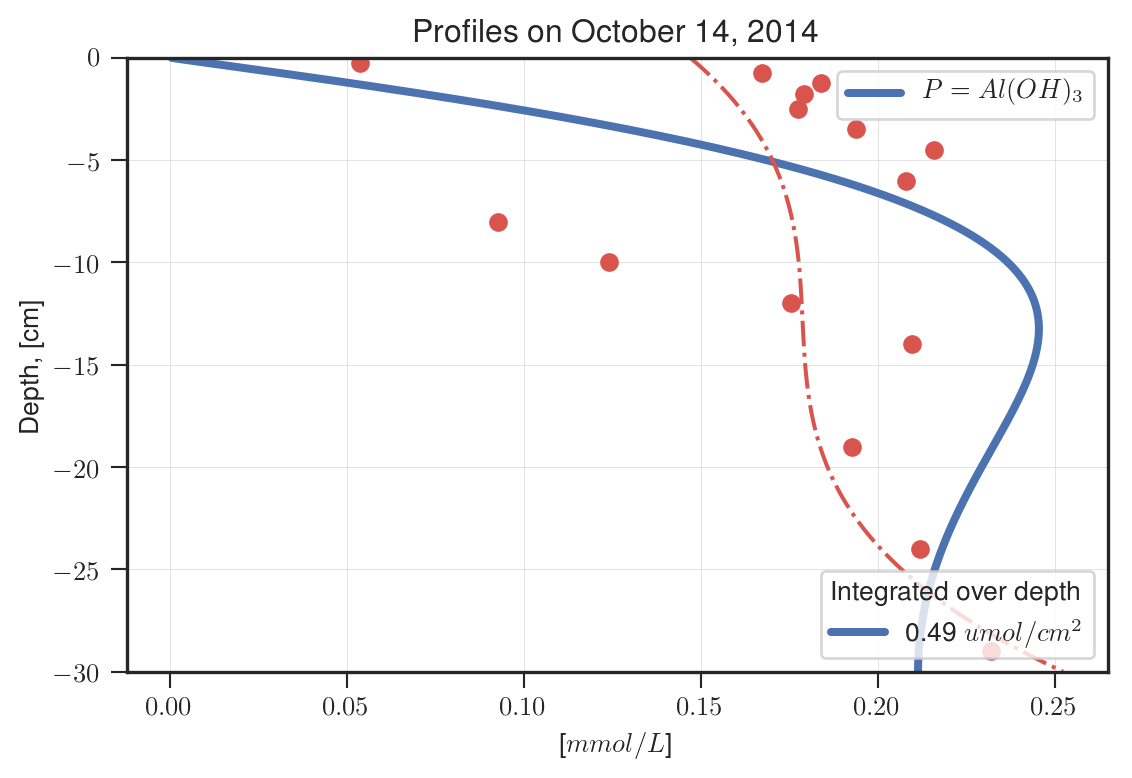

In [23]:
ax = plotter.profile('sediment', ['PO4adsc'], years_ago=y_a)
plt.scatter(sediment_data['Al-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

In [24]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Fe'][2:]/55.8)
yi = ius(-z)
# list(yi)

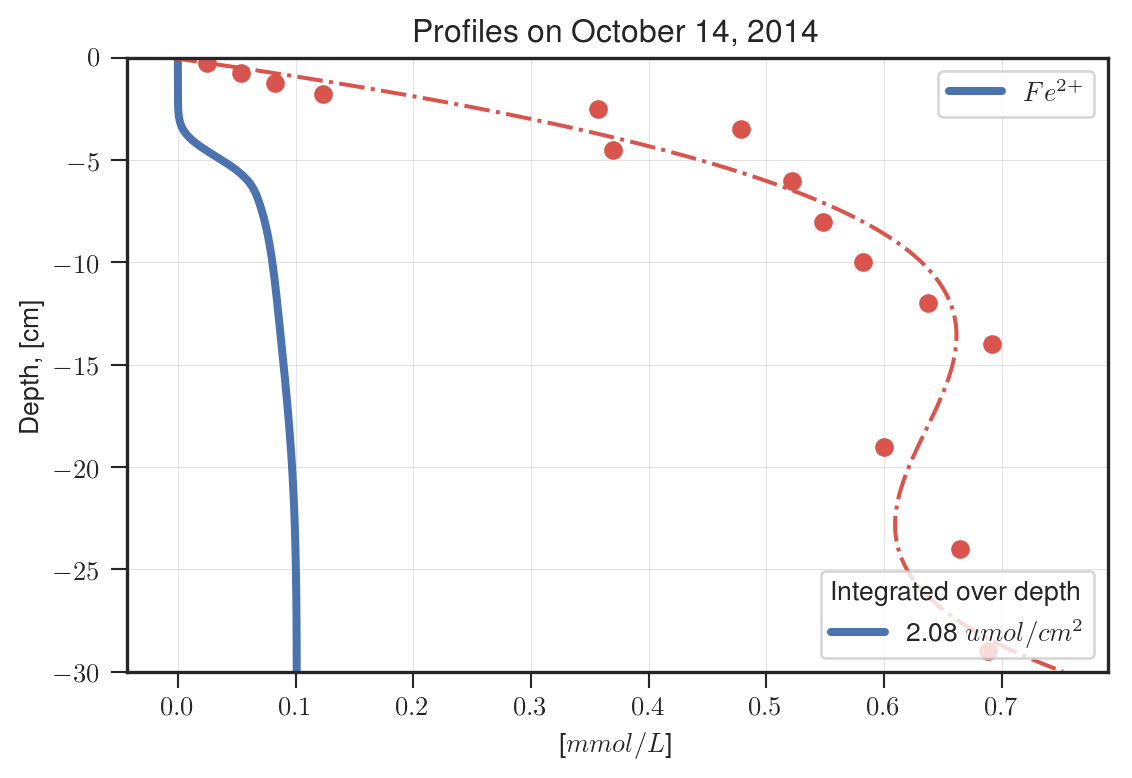

In [25]:
ax = plotter.profile('sediment', ['Fe2'], years_ago=y_a)
plt.scatter(sediment_data['Fe']/55.8, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

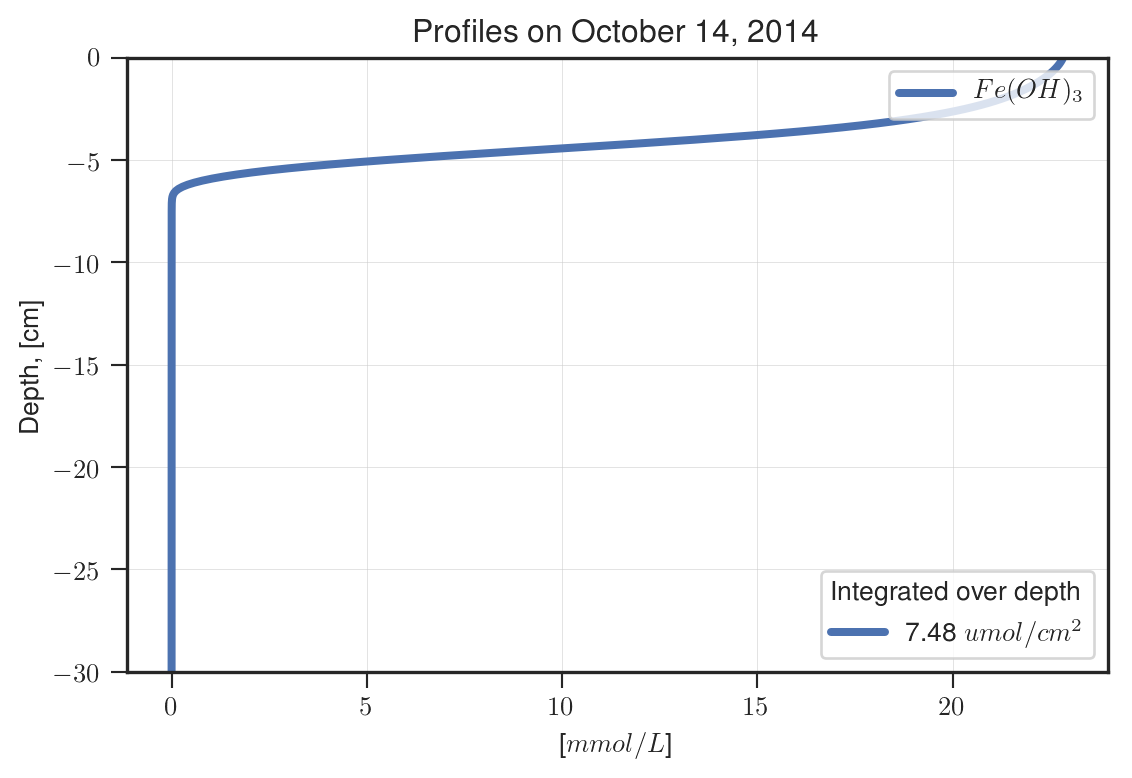

In [26]:
ax = plotter.profile('sediment', ['FeOH3'], years_ago=y_a)

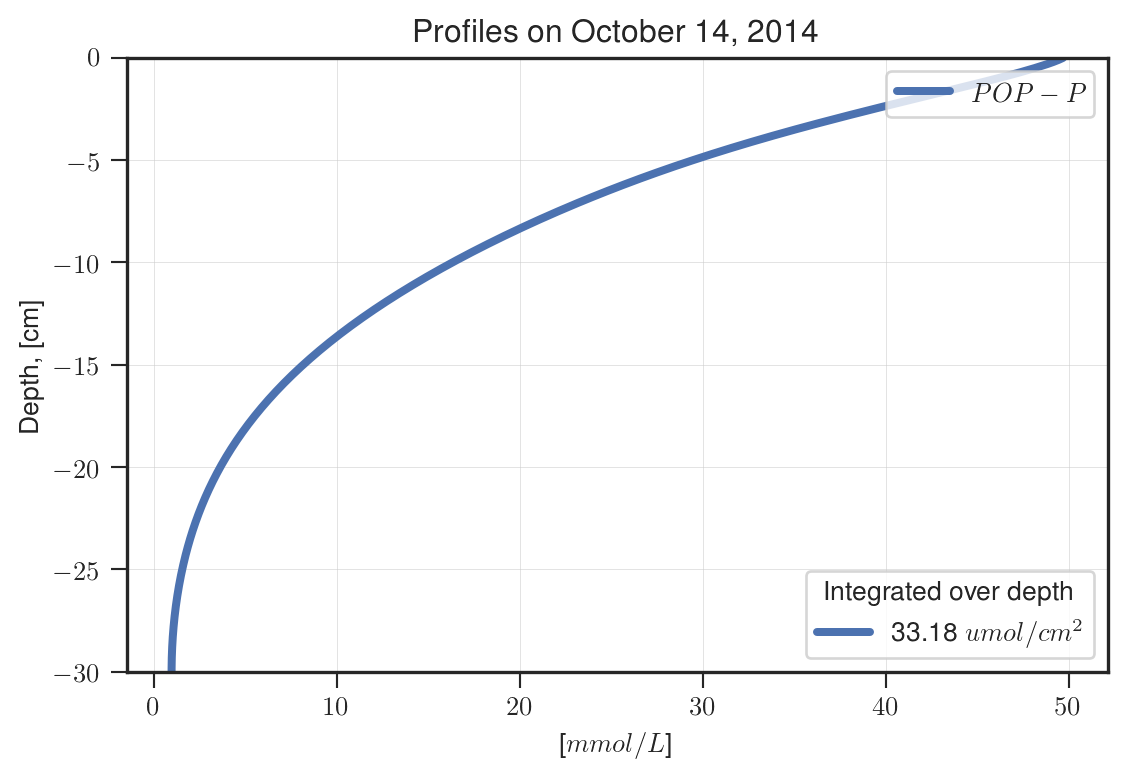

In [27]:
ax = plotter.profile('sediment', ['POP'], years_ago=y_a)